In [ ]:
# @title Check for the presence of data in the folder
%cd /content/drive/MyDrive/Colab Notebooks/project3_features_type1
%ls

/content/drive/MyDrive/Colab Notebooks/project3_features_type1
1x1-clips-angles.csv  2x5-clips-angles.csv     bulge2-clips-angles.csv    hairpin7-clips-angles.csv
1x2-clips-angles.csv  3x3-clips-angles.csv     bulge3-clips-angles.csv    model_layers_1_lr_0.1.h5
1x3-clips-angles.csv  3x4-clips-angles.csv     bulge4-clips-angles.csv    model_layers_2_lr_0.1.h5
1x4-clips-angles.csv  3x5-clips-angles.csv     bulge5-clips-angles.csv    model_layers_3_lr_0.1.h5
1x5-clips-angles.csv  4x4-clips-angles.csv     hairpin3-clips-angles.csv  model_lr0.01.h5
2x2-clips-angles.csv  4x5-clips-angles.csv     hairpin4-clips-angles.csv  model_lr0.1.h5
2x3-clips-angles.csv  5x5-clips-angles.csv     hairpin5-clips-angles.csv  model_lr1.h5
2x4-clips-angles.csv  bulge1-clips-angles.csv  hairpin6-clips-angles.csv


In [ ]:
# @title Correctly import the motif feature dataset into Python and merge CSV files.
import pandas as pd
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/project3_features_type1'
file_list = os.listdir(file_path)

merged_dataset = pd.DataFrame()

for file_name in file_list:
    if file_name.endswith('.csv'):
        full_file_path = os.path.join(file_path, file_name)
        print("Processing:", full_file_path)
        try:
            df = pd.read_csv(full_file_path)
            merged_dataset = pd.concat([merged_dataset, df], ignore_index=True)
        except Exception as e:
            print(f"Error processing {full_file_path}: {e}")
    else:
        print(f"Skipping non-CSV file: {full_file_path}")



merged_dataset.shape


Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/3x5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/4x4-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/bulge5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/4x5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/5x5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/2x5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/bulge4-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/1x5-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/2x4-clips-angles.csv
Processing: /content/drive/MyDrive/Colab Notebooks/project3_features_type1/3x4-clips-angles.csv
Processing: /content/drive/MyDrive

(201376, 87)

In [ ]:
# @title Explore the dataframe
merged_dataset.info()

####missing values
#54  pucker_amplitude_skewness  201375 non-null  float64 #has one missing value
#55  pucker_amplitude_kurtosis  201375 non-null  float64 #has one missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201376 entries, 0 to 201375
Data columns (total 87 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Motifname                  201376 non-null  object 
 1   Motifseq                   201376 non-null  object 
 2   bb_alpha_mean              201376 non-null  float64
 3   bb_alpha_median            201376 non-null  float64
 4   bb_alpha_std               201376 non-null  float64
 5   bb_alpha_range             201376 non-null  float64
 6   bb_alpha_skewness          201376 non-null  float64
 7   bb_alpha_kurtosis          201376 non-null  float64
 8   bb_beta_mean               201376 non-null  float64
 9   bb_beta_median             201376 non-null  float64
 10  bb_beta_std                201376 non-null  float64
 11  bb_beta_range              201376 non-null  float64
 12  bb_beta_skewness           201376 non-null  float64
 13  bb_beta_kurtosis           20

In [ ]:
# @title Further exploration
merged_dataset.describe()

bb_alpha_mean  bb_alpha_median   bb_alpha_std  bb_alpha_range  \
count  201376.000000    201376.000000  201376.000000   201376.000000   
mean       -0.496659        -0.910466       1.350011        4.395770   
std         0.494606         0.480681       0.355213        1.015213   
min        -2.158375        -2.681000       0.300155        1.124000   
25%        -0.840111        -1.136500       1.142877        3.845000   
50%        -0.534333        -1.043500       1.392461        4.412000   
75%        -0.177000        -0.903000       1.597512        5.218000   
max         2.344143         2.969000       2.795456        6.276000   

       bb_alpha_skewness  bb_alpha_kurtosis   bb_beta_mean  bb_beta_median  \
count      201376.000000      201376.000000  201376.000000   201376.000000   
mean            0.771858           0.104824       0.937961        1.753815   
std             0.660702           1.270397       0.966276        1.844463   
min            -1.742663          -1.928157      -2.987125       -3.118500   
25%             0.380857          -0.833702       0.301222        1.982000   
50%             0.812443          -0.230314       0.985083        2.668500   
75%             1.180836           0.872197       1.623778        2.839000   
max             2.986321           8.379807       3.091778        3.131000   

         bb_beta_std  bb_beta_range  ...  sugar_nu4_std  sugar_nu4_range  \
count  201376.000000  201376.000000  ...  201376.000000    201376.000000   
mean        2.360134       5.794448  ...       0.235781         0.703995   
std         0.555077       1.046822  ...       0.173169         0.482649   
min         0.000992       0.003000  ...       0.000806         0.002000   
25%         2.212622       5.885000  ...       0.044038         0.143000   
50%         2.514386       6.088000  ...       0.295738         1.026000   
75%         2.720270       6.180000  ...       0.380146         1.110000   
max         3.093798       6.283000  ...       0.700840         2.019000   

       sugar_nu4_skewness  sugar_nu4_kurtosis  sugar_nu5_mean  \
count       201376.000000       201376.000000   201376.000000   
mean             1.170880            1.116172        0.329384   
std              1.099720            2.568133        0.057773   
min             -2.495748           -1.999955       -0.147286   
25%              0.289388           -0.899460        0.298875   
50%              1.151175           -0.032117        0.338875   
75%              2.282604            3.647154        0.368000   
max              3.864833           12.982370        0.636000   

       sugar_nu5_median  sugar_nu5_std  sugar_nu5_range  sugar_nu5_skewness  \
count     201376.000000  201376.000000    201376.000000       201376.000000   
mean           0.359860       0.118944         0.389545           -0.837439   
std            0.048672       0.065635         0.212279            0.977256   
min           -0.253000       0.000640         0.002000           -3.631763   
25%            0.346000       0.057096         0.188000           -1.577845   
50%            0.365000       0.122794         0.423000           -0.831323   
75%            0.383000       0.165573         0.517000           -0.125700   
max            0.678000       0.584526         1.862000            2.994080   

       sugar_nu5_kurtosis  
count       201376.000000  
mean             0.555720  
std              1.888815  
min             -1.997915  
25%             -0.876008  
50%             -0.129894  
75%              1.694259  
max             11.853965  

[8 rows x 84 columns]

In [ ]:
# @title Task 2: Preprocessing the data: data cleaning, data splitting, normalization, and label encoding
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Drop missing values
merged_dataset = merged_dataset.dropna()

#save the merged dataset as csv file
merged_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/merged_dataset.csv', index=False)

# Shuffle data
shuffled_data = shuffle(merged_dataset, random_state=42)

# Encode categorical labels to integers
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(shuffled_data['Label'])

# Separate features and integer-encoded labels
features = shuffled_data.drop(['Label', 'Motifname', 'Motifseq'], axis=1)
labels = integer_encoded_labels

# Splitting the data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.25, random_state=42)

# Standardization of features for neural networks
scaler = StandardScaler()
train_features_normalized = scaler.fit_transform(train_features)
val_features_normalized = scaler.transform(val_features)
test_features_normalized = scaler.transform(test_features)

# One-hot encoding labels
num_classes = len(label_encoder.classes_)
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes, dtype='float32')
val_labels_onehot = tf.keras.utils.to_categorical(val_labels, num_classes=num_classes, dtype='float32')
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes, dtype='float32')


In [ ]:
# @title Feature selection using correlation

feature_names = list(merged_dataset.columns)[2:-1]
train_features_df = pd.DataFrame(train_features_normalized, columns=feature_names)

#correlation
corr_r = train_features_df.corr()
corr_r

bb_alpha_mean  bb_alpha_median  bb_alpha_std  \
bb_alpha_mean            1.000000         0.738116      0.681605   
bb_alpha_median          0.738116         1.000000      0.350024   
bb_alpha_std             0.681605         0.350024      1.000000   
bb_alpha_range           0.343389         0.157895      0.829539   
bb_alpha_skewness       -0.049338        -0.375484      0.087461   
...                           ...              ...           ...   
sugar_nu5_median        -0.160060        -0.209563     -0.124820   
sugar_nu5_std            0.024396         0.113703      0.031375   
sugar_nu5_range         -0.012486         0.075123      0.013406   
sugar_nu5_skewness       0.059137         0.025399      0.038008   
sugar_nu5_kurtosis      -0.097639        -0.076653     -0.064398   

                    bb_alpha_range  bb_alpha_skewness  bb_alpha_kurtosis  \
bb_alpha_mean             0.343389          -0.049338          -0.523276   
bb_alpha_median           0.157895          -0.375484          -0.391425   
bb_alpha_std              0.829539           0.087461          -0.433253   
bb_alpha_range            1.000000           0.204910          -0.050698   
bb_alpha_skewness         0.204910           1.000000           0.576078   
...                            ...                ...                ...   
sugar_nu5_median         -0.068316           0.117853           0.163935   
sugar_nu5_std             0.057702          -0.142202          -0.172929   
sugar_nu5_range           0.064494          -0.120531          -0.133872   
sugar_nu5_skewness       -0.048704           0.020994           0.001787   
sugar_nu5_kurtosis        0.036681           0.026691           0.092651   

                    bb_beta_mean  bb_beta_median  bb_beta_std  bb_beta_range  \
bb_alpha_mean          -0.247347       -0.209021     0.099470       0.058806   
bb_alpha_median        -0.260666       -0.247187     0.036429       0.015854   
bb_alpha_std           -0.279367       -0.214843     0.154761       0.098632   
bb_alpha_range         -0.216363       -0.147391     0.151803       0.107909   
bb_alpha_skewness       0.163831        0.150280    -0.036881      -0.024850   
...                          ...             ...          ...            ...   
sugar_nu5_median        0.207431        0.192414    -0.068410      -0.033133   
sugar_nu5_std          -0.248269       -0.180040     0.175462       0.128469   
sugar_nu5_range        -0.237497       -0.165412     0.185889       0.140685   
sugar_nu5_skewness      0.059362        0.003746    -0.126031      -0.105603   
sugar_nu5_kurtosis     -0.005137        0.037904     0.097167       0.088122   

                    ...  sugar_nu4_std  sugar_nu4_range  sugar_nu4_skewness  \
bb_alpha_mean       ...       0.030106        -0.008782           -0.082469   
bb_alpha_median     ...       0.113673         0.074551           -0.030733   
bb_alpha_std        ...       0.009565        -0.008931           -0.054998   
bb_alpha_range      ...       0.054970         0.061487            0.045590   
bb_alpha_skewness   ...      -0.131556        -0.113597           -0.033694   
...                 ...            ...              ...                 ...   
sugar_nu5_median    ...      -0.257677        -0.191954            0.086209   
sugar_nu5_std       ...       0.864636         0.834034            0.404493   
sugar_nu5_range     ...       0.802151         0.837596            0.520905   
sugar_nu5_skewness  ...      -0.527273        -0.653318           -0.808879   
sugar_nu5_kurtosis  ...       0.204959         0.404504            0.712417   

                    sugar_nu4_kurtosis  sugar_nu5_mean  sugar_nu5_median  \
bb_alpha_mean                -0.106560       -0.140951         -0.160060   
bb_alpha_median              -0.073201       -0.207199         -0.209563   
bb_alpha_std                 -0.066185       -0.107328         -0.124820   
bb_alpha_range                0.044826       -0.084545         -0.068316   


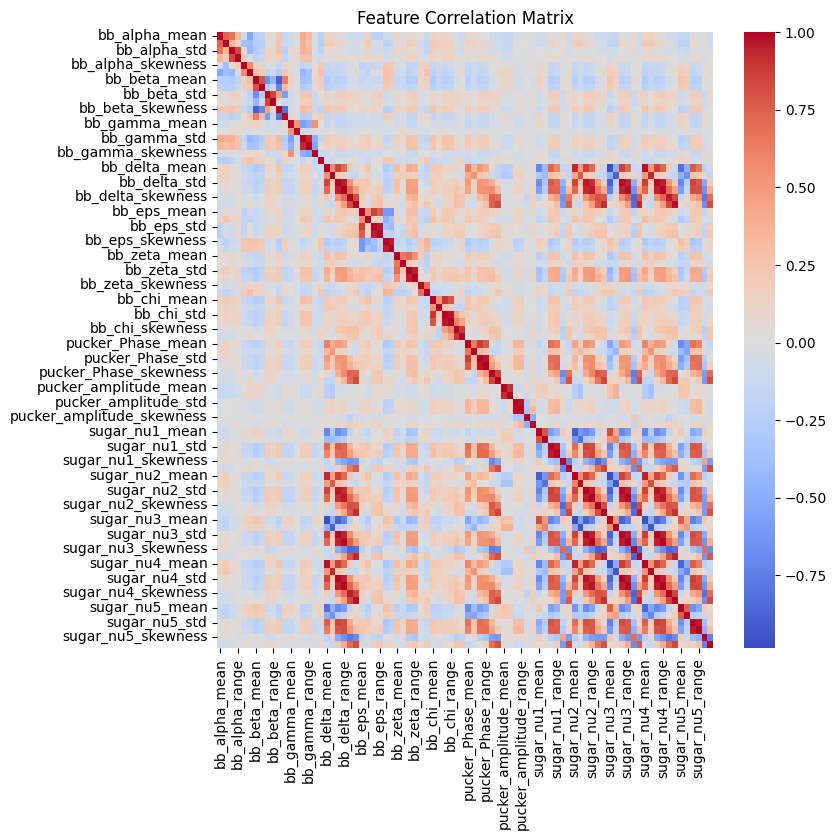

In [ ]:
# Visualizing the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(corr_r, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
#Feature selection with a threshold of r set to 0.8
threshold = 0.8
columns = set(corr_r.columns)

for i in range(len(corr_r.columns)):
    for j in range(i):
        if abs(corr_r.iloc[i, j]) > threshold:
            if corr_r.columns[j] in columns:
                columns.remove(corr_r.columns[j])

selected_features_corr = list(columns)
print("Number of features selected based on correlation:", len(selected_features_corr), "\n\n")
selected_features_corr


Number of features selected based on correlation: 37 




['bb_gamma_median',
 'bb_beta_skewness',
 'bb_gamma_kurtosis',
 'bb_alpha_skewness',
 'bb_beta_kurtosis',
 'bb_alpha_kurtosis',
 'pucker_amplitude_kurtosis',
 'bb_chi_median',
 'sugar_nu4_median',
 'bb_alpha_mean',
 'bb_eps_kurtosis',
 'sugar_nu5_kurtosis',
 'bb_zeta_mean',
 'bb_beta_median',
 'sugar_nu5_range',
 'sugar_nu5_skewness',
 'bb_gamma_range',
 'bb_zeta_range',
 'sugar_nu5_mean',
 'bb_gamma_skewness',
 'pucker_amplitude_skewness',
 'bb_chi_range',
 'bb_eps_range',
 'bb_chi_kurtosis',
 'bb_zeta_median',
 'bb_eps_median',
 'pucker_amplitude_range',
 'bb_gamma_mean',
 'bb_beta_range',
 'pucker_amplitude_median',
 'bb_zeta_skewness',
 'bb_alpha_range',
 'pucker_Phase_median',
 'bb_zeta_kurtosis',
 'sugar_nu5_median',
 'bb_alpha_median',
 'pucker_Phase_range']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

selected_features_corr_indices = [feature_names.index(feature) for feature in selected_features_corr if feature in feature_names]
filtered_train_features_corr = train_features_normalized[:, selected_features_corr_indices]


# Reducing dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(filtered_train_features_corr)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Label'] = label_encoder.inverse_transform(train_labels)

PCA_plot = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Label',
    title='PCA Result',
    labels={
        'PC1': 'Principal Component 1',
        'PC2': 'Principal Component 2'
    },
    category_orders={"Label": sorted(pca_df['Label'].unique())}
)
PCA_plot.show()

In [ ]:
# @title Feature selection using Lasso Regression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

# Scaling the normalized features as lasso requires uniform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_features_normalized)

# regularization
# you can try multiple alpha values and pick best
# As it is resource demanding, I picked random 0.01
lasso = LassoCV(alphas=[0.01], cv=5, max_iter=10000)
lasso.fit(X_scaled, train_labels)

# lasso pushes coefficients of irrelevant features to zero
# select features which are not zero coefficients
selected_features_lasso = [feature for feature, coef in zip(feature_names, lasso.coef_) if coef != 0]

print("Number of features selected based on Lasso:", len(selected_features_lasso), "\n\n")
selected_features_lasso


Number of features selected based on Lasso: 56 




['bb_alpha_mean',
 'bb_alpha_median',
 'bb_alpha_std',
 'bb_alpha_range',
 'bb_alpha_skewness',
 'bb_alpha_kurtosis',
 'bb_beta_mean',
 'bb_beta_median',
 'bb_beta_std',
 'bb_beta_range',
 'bb_beta_kurtosis',
 'bb_gamma_mean',
 'bb_gamma_median',
 'bb_gamma_std',
 'bb_gamma_range',
 'bb_delta_median',
 'bb_delta_range',
 'bb_eps_mean',
 'bb_eps_median',
 'bb_eps_std',
 'bb_eps_range',
 'bb_eps_kurtosis',
 'bb_zeta_mean',
 'bb_zeta_median',
 'bb_zeta_range',
 'bb_zeta_skewness',
 'bb_zeta_kurtosis',
 'bb_chi_mean',
 'bb_chi_median',
 'bb_chi_std',
 'bb_chi_skewness',
 'bb_chi_kurtosis',
 'pucker_Phase_mean',
 'pucker_Phase_skewness',
 'pucker_Phase_kurtosis',
 'pucker_amplitude_mean',
 'pucker_amplitude_median',
 'pucker_amplitude_std',
 'pucker_amplitude_range',
 'pucker_amplitude_skewness',
 'pucker_amplitude_kurtosis',
 'sugar_nu1_std',
 'sugar_nu1_range',
 'sugar_nu1_kurtosis',
 'sugar_nu2_skewness',
 'sugar_nu2_kurtosis',
 'sugar_nu3_mean',
 'sugar_nu3_median',
 'sugar_nu3_skewness

In [ ]:
### preparing the dataset with selected features from lasso
selected_features_lasso_indices = [feature_names.index(feature) for feature in selected_features_lasso if feature in feature_names]

filtered_train_features = train_features_normalized[:, selected_features_lasso_indices]
filtered_val_features = val_features_normalized[:, selected_features_lasso_indices]
filtered_test_features = test_features_normalized[:, selected_features_lasso_indices]

In [ ]:
# Reducing dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(filtered_train_features)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Label'] = label_encoder.inverse_transform(train_labels)

PCA_plot = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Label',
    title='PCA Result',
    labels={
        'PC1': 'Principal Component 1',
        'PC2': 'Principal Component 2'
    },
    category_orders={"Label": sorted(pca_df['Label'].unique())}
)
PCA_plot.show()

In [ ]:
# @title Task 8: Fitting the model on training data and making predictions on test data: 1. Neural network classifier
####Define the neural network classifier with softmax function as output
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # initialize Sequential model

model.add(Dense(100, input_shape=(len(selected_features_lasso_indices),), activation='relu')) #Input layer
model.add(Dense(25, activation='softmax')) #output layer with 25 classes and softmax activation

# Compile model, use categorical_crossentropy as loss function for softmax function
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fitting the model on training data
train_history = model.fit(filtered_train_features, train_labels_onehot, validation_data=(filtered_val_features, val_labels_onehot), epochs=50, batch_size=32)

# making predictions on the training and validation datasets
train_predictions_proba = model.predict(filtered_train_features) #will use test data only after tuning
val_predictions_proba = model.predict(filtered_val_features)

Epoch 1/50
3776/3776 [==============================] - 16s 4ms/step - loss: 1.5295 - accuracy: 0.5332 - val_loss: 1.2566 - val_accuracy: 0.6108
Epoch 2/50
3776/3776 [==============================] - 17s 4ms/step - loss: 1.1571 - accuracy: 0.6428 - val_loss: 1.0722 - val_accuracy: 0.6712
Epoch 3/50
3776/3776 [==============================] - 11s 3ms/step - loss: 1.0060 - accuracy: 0.6929 - val_loss: 0.9522 - val_accuracy: 0.7104
Epoch 4/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.9027 - accuracy: 0.7248 - val_loss: 0.8748 - val_accuracy: 0.7319
Epoch 5/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.8287 - accuracy: 0.7474 - val_loss: 0.8126 - val_accuracy: 0.7563
Epoch 6/50
3776/3776 [==============================] - 12s 3ms/step - loss: 0.7715 - accuracy: 0.7658 - val_loss: 0.7595 - val_accuracy: 0.7713
Epoch 7/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.7248 - accuracy: 0.7797 - val_loss: 0.7262 - val_ac

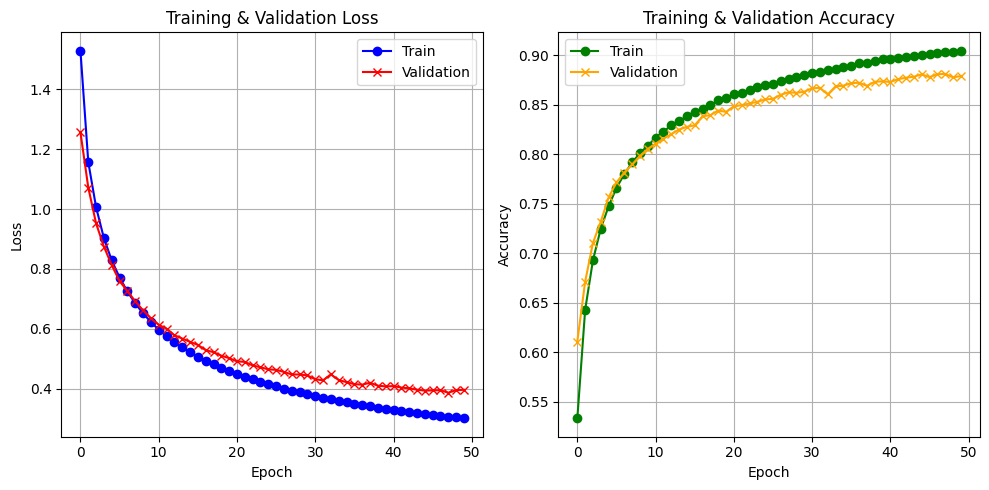

In [ ]:
# @title Based on the training_history, visualize the learning curves for the training process as follows
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(train_history.history['loss'], label='Train', marker='o', color='blue')
plt.plot(train_history.history['val_loss'], label='Validation', marker='x', color='red')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# accuracy
plt.subplot(1, 2, 2)
plt.plot(train_history.history['accuracy'], label='Train', marker='o', color='green')
plt.plot(train_history.history['val_accuracy'], label='Validation', marker='x', color='orange')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# @title Tuning of neural network classifier with different learning rates

# Model Evaluation: Initial training process results suggested that the loss decreased, and accuracy increased with 50 epochs in both training and validation datasets.
# Besides, the accuracy at 50th epoch was 0.90 and 0.88. for training and validation datasets, respectively indicating there was no under/overfitting because the model performed better on both the datasets.

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

def build_model(filtered_train_features):
  model = Sequential()
  model.add(Dense(100, input_shape=(filtered_train_features.shape[1],), activation='relu')) # input layer -> hidden layer 1
  model.add(Dense(100, activation='relu')) # hidden layer 1 -> hidden layer 2
  model.add(Dense(25, activation='softmax')) # hidden layer 2 -> output layer
  return model


learning_rate_options = [0.01, 0.1, 1]

#loop over learning rates
for learning_rate in learning_rate_options:
  print(f"Training model with learning rate: {learning_rate}")
  model = build_model(filtered_train_features)
  optimizer_to_run = SGD(learning_rate=learning_rate)
  model.compile(loss = "categorical_crossentropy", optimizer = optimizer_to_run, metrics = ['accuracy'])
  model.fit(filtered_train_features, train_labels_onehot, validation_data = (filtered_val_features, val_labels_onehot), epochs = 50, verbose = 1)
  model.save("model_lr"+str(learning_rate)+".h5")
  print ("\nLearning rate: ", learning_rate, " Validation Accuracy: ", model.evaluate(filtered_val_features, val_labels_onehot, verbose=None))
  print("\n")

Training model with learning rate: 0.01
Epoch 1/50
3776/3776 [==============================] - 13s 3ms/step - loss: 1.5305 - accuracy: 0.5359 - val_loss: 1.2605 - val_accuracy: 0.6125
Epoch 2/50
3776/3776 [==============================] - 10s 3ms/step - loss: 1.1649 - accuracy: 0.6401 - val_loss: 1.0765 - val_accuracy: 0.6693
Epoch 3/50
3776/3776 [==============================] - 10s 3ms/step - loss: 1.0101 - accuracy: 0.6904 - val_loss: 0.9572 - val_accuracy: 0.7076
Epoch 4/50
3776/3776 [==============================] - 12s 3ms/step - loss: 0.9064 - accuracy: 0.7238 - val_loss: 0.8763 - val_accuracy: 0.7339
Epoch 5/50
3776/3776 [==============================] - 11s 3ms/step - loss: 0.8299 - accuracy: 0.7486 - val_loss: 0.8040 - val_accuracy: 0.7591
Epoch 6/50
3776/3776 [==============================] - 9s 2ms/step - loss: 0.7701 - accuracy: 0.7663 - val_loss: 0.7551 - val_accuracy: 0.7716
Epoch 7/50
3776/3776 [==============================] - 12s 3ms/step - loss: 0.7226 - accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.




Learning rate:  0.01  Validation Accuracy:  [0.40228694677352905, 0.8755307197570801]


Training model with learning rate: 0.1
Epoch 1/50
3776/3776 [==============================] - 12s 3ms/step - loss: 1.0226 - accuracy: 0.6799 - val_loss: 0.7912 - val_accuracy: 0.7444
Epoch 2/50
3776/3776 [==============================] - 11s 3ms/step - loss: 0.6716 - accuracy: 0.7864 - val_loss: 0.6159 - val_accuracy: 0.8020
Epoch 3/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.5576 - accuracy: 0.8209 - val_loss: 0.5347 - val_accuracy: 0.8279
Epoch 4/50
3776/3776 [==============================] - 9s 2ms/step - loss: 0.4948 - accuracy: 0.8402 - val_loss: 0.4956 - val_accuracy: 0.8410
Epoch 5/50
3776/3776 [==============================] - 11s 3ms/step - loss: 0.4525 - accuracy: 0.8529 - val_loss: 0.4632 - val_accuracy: 0.8492
Epoch 6/50
3776/3776 [==============================] - 9s 2ms/step - loss: 0.4254 - accuracy: 0.8612 - val_loss: 0.4424 - val_accuracy: 0.8594
Epoc

In [ ]:
# @title Tuning of neural network classifier with different number of layers

#Learning rate:  0.1  best among three learning rates from the results of the previous step


def build_model(n_layers, input_shape):
    model = Sequential()

    model.add(Dense(100, input_shape=(input_shape,), activation='relu'))
    for i in range(1, n_layers):
        model.add(Dense(100, activation='relu'))

    model.add(Dense(25, activation='softmax'))
    return model

# Number of features in input data
input_shape = filtered_train_features.shape[1]
layers = [1, 2, 3]

# Loop over number of layers
for n_layer in layers:
    model = build_model(n_layer, input_shape)
    optimizer_to_run = SGD(learning_rate=0.1)  # best learning rate from previous tuning
    model.compile(loss="categorical_crossentropy", optimizer=optimizer_to_run, metrics=['accuracy'])
    model.fit(filtered_train_features, train_labels_onehot, validation_data=(filtered_val_features, val_labels_onehot), epochs=50, verbose=1)
    model.save(f"model_layers_{n_layer}_lr_0.1.h5")
    val_accuracy = model.evaluate(filtered_val_features, val_labels_onehot, verbose=0)[1]
    print(f"\nLayers: {n_layer}, Validation Accuracy: {val_accuracy:.4f}\n")


Epoch 1/50
3776/3776 [==============================] - 11s 3ms/step - loss: 1.1165 - accuracy: 0.6564 - val_loss: 0.8865 - val_accuracy: 0.7252
Epoch 2/50
3776/3776 [==============================] - 8s 2ms/step - loss: 0.8193 - accuracy: 0.7447 - val_loss: 0.7703 - val_accuracy: 0.7618
Epoch 3/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.7161 - accuracy: 0.7772 - val_loss: 0.7083 - val_accuracy: 0.7802
Epoch 4/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.6559 - accuracy: 0.7952 - val_loss: 0.6602 - val_accuracy: 0.7946
Epoch 5/50
3776/3776 [==============================] - 9s 3ms/step - loss: 0.6129 - accuracy: 0.8075 - val_loss: 0.6320 - val_accuracy: 0.8021
Epoch 6/50
3776/3776 [==============================] - 12s 3ms/step - loss: 0.5779 - accuracy: 0.8186 - val_loss: 0.5935 - val_accuracy: 0.8173
Epoch 7/50
3776/3776 [==============================] - 9s 2ms/step - loss: 0.5512 - accuracy: 0.8277 - val_loss: 0.5606 - val_accur

In [ ]:
#training the data with best learning rate and layers resulted from tuning

#Layers: 2, best among three different layers based on the results from the previous step

#summary of tuning
best_n_layer = 2
best_lr = 0.1

# Build and compile the model with the best parameters
tuned_model_nn = build_model(best_n_layer, filtered_train_features.shape[1])
tuned_model_nn.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=best_lr), metrics=['accuracy'])

# Training the model
tuned_model_nn.fit(filtered_train_features, train_labels_onehot, validation_data=(filtered_val_features, val_labels_onehot), epochs=50, verbose=1)

# Evaluate on training data
train_accuracy_tuned_nn = tuned_model_nn.evaluate(filtered_train_features, train_labels_onehot, verbose=0)[1]
print("Training Accuracy:", train_accuracy_tuned_nn)

# Evaluate on test data
test_accuracy_tuned_nn = tuned_model_nn.evaluate(filtered_test_features, test_labels_onehot, verbose=0)[1]
print("Test Accuracy:", test_accuracy_tuned_nn)

Epoch 1/50
3776/3776 [==============================] - 10s 3ms/step - loss: 1.0254 - accuracy: 0.6791 - val_loss: 0.7697 - val_accuracy: 0.7589
Epoch 2/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.6630 - accuracy: 0.7892 - val_loss: 0.6113 - val_accuracy: 0.8040
Epoch 3/50
3776/3776 [==============================] - 12s 3ms/step - loss: 0.5520 - accuracy: 0.8234 - val_loss: 0.7843 - val_accuracy: 0.7423
Epoch 4/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.4917 - accuracy: 0.8428 - val_loss: 0.4970 - val_accuracy: 0.8421
Epoch 5/50
3776/3776 [==============================] - 9s 3ms/step - loss: 0.4472 - accuracy: 0.8551 - val_loss: 0.4749 - val_accuracy: 0.8491
Epoch 6/50
3776/3776 [==============================] - 11s 3ms/step - loss: 0.4186 - accuracy: 0.8648 - val_loss: 0.4451 - val_accuracy: 0.8600
Epoch 7/50
3776/3776 [==============================] - 10s 3ms/step - loss: 0.3960 - accuracy: 0.8714 - val_loss: 0.4219 - val_acc

In [ ]:
#Evaluation metrics for neural network classifier

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def evaluation_metrics_nn(filtered_train_features,train_labels):

  train_predictions_best_nn = model.predict(filtered_train_features)
  test_predictions_best_nn = model.predict(filtered_test_features)

  # Convert probabilities to class labels for multiclass
  train_prediction_labels_nn = np.argmax(train_predictions_best_nn, axis=1)
  test_prediction_labels_nn = np.argmax(test_predictions_best_nn, axis=1)

  # Evaluation metrics
  nn_acc_train = accuracy_score(train_labels, train_prediction_labels_nn)
  nn_prec_train = precision_score(train_labels, train_prediction_labels_nn, average='macro')
  nn_recall_train = recall_score(train_labels, train_prediction_labels_nn, average='macro')
  nn_f1_train = f1_score(train_labels, train_prediction_labels_nn, average='macro')
  nn_roc_train = roc_auc_score(train_labels, train_predictions_best_nn, multi_class="ovr", average="macro")

  return nn_acc_train, nn_prec_train, nn_recall_train, nn_f1_train, nn_roc_train

nn_acc_train, nn_prec_train, nn_recall_train, nn_f1_train, nn_roc_train = evaluation_metrics_nn(filtered_train_features,train_labels)
nn_acc_test, nn_prec_test, nn_recall_test, nn_f1_test, nn_roc_test = evaluation_metrics_nn(filtered_test_features,test_labels)

print("Train data metrics:", round(nn_acc_train,3), round(nn_prec_train,3), round(nn_recall_train,3), round(nn_f1_train,3), round(nn_roc_train,3))
print("Test data metrics: ", round(nn_acc_test,3), round(nn_prec_test,3), round(nn_recall_test,3), round(nn_f1_test,3), round(nn_roc_test,3))

1259/1259 [==============================] - 2s 2ms/step
Train data metrics: 0.932 0.865 0.859 0.86 0.999
Test data metrics:  0.895 0.799 0.783 0.787 0.994


elbow at k 15
elbow at k 25
elbow at k 35
elbow at k 45


Text(0.5, 1.0, 'Silhouette Graph')

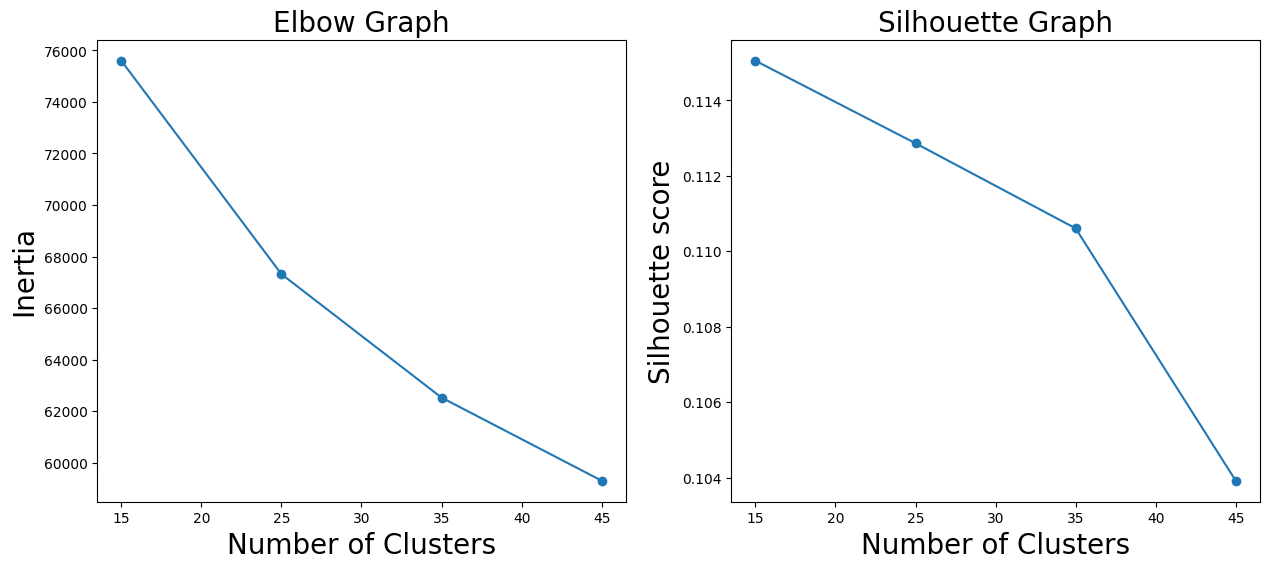

In [ ]:
# @title Fitting the model on training data and making predictions on test data: 2. KMeans Clustering unsupervised learning

# Model description and evaluation using silhoutte score: This is an unsupervised method in which we pretended like we did not have labels and
# our main aim was to train a model that could result in 25 clusters.
# Initially different number of clusters (k) were used to plot the elbow plot and silhouette scores.
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Normalize the data
scaler = MinMaxScaler()
scaled_train_features = scaler.fit_transform(filtered_train_features)
scaled_val_features = scaler.transform(filtered_val_features)
scaled_test_features = scaler.transform(filtered_test_features)

###Elbow curve to get optimum number of k

elbow = {"clusters": [], "inertia": []}
silhouette={"silhouette":[],"clusters":[]}

#calculate inertia for various k values
K = [15,25,35,45]

for k in K:
  kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(scaled_train_features)
  print("elbow at k", k)
  elbow["clusters"].append(k)
  elbow["inertia"].append(kmeans_model.inertia_)
  silhouette["silhouette"].append(silhouette_score(scaled_train_features,kmeans_model.labels_))

#Elbow Plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(x=elbow["clusters"],y=elbow["inertia"])
plt.plot(elbow["clusters"], elbow["inertia"])
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Inertia", size=20)
plt.title("Elbow Graph", size=20)


# Silhouette
plt.subplot(1,2,2)
plt.scatter(x=elbow["clusters"],y=silhouette["silhouette"])
plt.plot(elbow["clusters"], silhouette["silhouette"])
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Silhouette score", size=20)
plt.title("Silhouette Graph", size=20)


In [ ]:
#KMeans: fitting the model on training data with optimal K
optimal_k = 25 #from elbow with second highest silhouette score

#Note: At k value 25 in the elbow plot, the inertia decreased, but the highest silhouette score was assigned to k value of 15, followed by 25.
# As we already knew that there are 25 groups, we went with the suggestion of elbow plot which has the second-best silhouette score.

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_train_features)

# making predictions on test data
val_prediction_kmeans = kmeans.predict(scaled_val_features)
train_prediction_kmeans = kmeans.predict(scaled_train_features)

In [ ]:
#get the labels
train_cluster_labels_kmeans = kmeans.labels_
train_cluster_labels_kmeans

array([15, 16, 13, ...,  1,  9,  3], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Parameter grid
max_iters = [300, 500]
n_inits = [10, 20]

# Function to tune KMeans
def tuning_kmeans(scaled_train_features, k_values=25, init_method='k-means++', max_iters=max_iters, n_inits=n_inits):
    results = []
    for max_iter in max_iters:
        print("max_iter:", max_iter, end ='')
        for n_init in n_inits:
            print("n_init:", n_init)
            kmeans = KMeans(n_clusters=k_values, init=init_method, max_iter=max_iter, n_init=n_init, random_state=42)
            kmeans.fit(scaled_train_features)
            silhouette_avg = silhouette_score(scaled_train_features, kmeans.labels_)
            results.append((k_values, init_method, n_init, max_iter, silhouette_avg))
    return results

# Evaluate parameters
results = tuning_kmeans(scaled_train_features, k_values=25, init_method='k-means++')
for result in results:
    print("k: {}, init: {}, n_init: {}, max_iter: {}, silhouette: {:.4f}".format(*result))


max_iter: 300n_init: 10
n_init: 20
max_iter: 500n_init: 10
n_init: 20
k: 25, init: k-means++, n_init: 10, max_iter: 300, silhouette: 0.1129
k: 25, init: k-means++, n_init: 20, max_iter: 300, silhouette: 0.1129
k: 25, init: k-means++, n_init: 10, max_iter: 500, silhouette: 0.1129
k: 25, init: k-means++, n_init: 20, max_iter: 500, silhouette: 0.1129


In [ ]:
#using the best parameters on test data
'''
k: 25, init: k-means++, n_init: 10, max_iter: 300, silhouette: 0.1129
k: 25, init: k-means++, n_init: 20, max_iter: 300, silhouette: 0.1129
k: 25, init: k-means++, n_init: 10, max_iter: 500, silhouette: 0.1129
k: 25, init: k-means++, n_init: 20, max_iter: 500, silhouette: 0.1129
'''

#since all combinations have same silhouette score, picking n_init: 10, max_iter: 300, computationally require less resources
# These are the hyperparameters that we used to train the model initially, hence we are not refitting them again


'\nk: 25, init: k-means++, n_init: 10, max_iter: 300, silhouette: 0.1129\nk: 25, init: k-means++, n_init: 20, max_iter: 300, silhouette: 0.1129\nk: 25, init: k-means++, n_init: 10, max_iter: 500, silhouette: 0.1129\nk: 25, init: k-means++, n_init: 20, max_iter: 500, silhouette: 0.1129\n'

In [ ]:
# @title Fitting the model on training data and making predictions on test data: 3. Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1
)

# Train the model
decision_tree_model.fit(filtered_train_features, train_labels)

# Predict using the model
train_predictions_dt = decision_tree_model.predict(filtered_train_features)
val_predictions_dt = decision_tree_model.predict(filtered_val_features)

#accuracy
train_accuracy_dt = accuracy_score(train_labels, train_predictions_dt)
val_accuracy_dt = accuracy_score(val_labels, val_predictions_dt)

print("Training Accuracy:", train_accuracy_dt)
print("Validation Accuracy:", val_accuracy_dt)

Training Accuracy: 0.7403600248292985
Validation Accuracy: 0.7286157666045934


In [ ]:
#tuning the model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree_classifier = DecisionTreeClassifier()

# parameter grid for GridSearchCV
param_grid = {
    "max_depth": [8, 10, 12],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt']
}

# GridSearchCV object
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(filtered_train_features, train_labels)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4]},
             scoring='accuracy', verbose=1)

In [ ]:
#grid_search.best_estimator_
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=12, max_features='sqrt', min_samples_split=4)

In [ ]:
# best estimator found by GridSearchCV
best_tree_classifier = grid_search.best_estimator_

# use best_tree_classifier to make predictions and evaluate the model
train_predictions_dt_best = best_tree_classifier.predict(filtered_train_features)
val_predictions_dt_best = best_tree_classifier.predict(filtered_val_features)
test_predictions_dt_best = best_tree_classifier.predict(filtered_test_features)

# Calculate and print accuracy
train_accuracy_dt_best = accuracy_score(train_labels, train_predictions_dt_best)
val_accuracy_dt_best = accuracy_score(val_labels, val_predictions_dt_best)
test_accuracy_dt_best = accuracy_score(test_labels, test_predictions_dt_best)

print("Training Accuracy:  ", round(train_accuracy_dt_best,3))
print("Validation Accuracy:", round(val_accuracy_dt_best,3))
print("Test Accuracy:      ", round(test_accuracy_dt_best,3))

Training Accuracy:   0.826
Validation Accuracy: 0.786
Test Accuracy:       0.786


In [ ]:
# @title Fitting the model on training data and making predictions on test data: 4. Random forest classifiers
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=9, random_state=42)

# Train the model
random_forest_model.fit(filtered_train_features, train_labels)

#make prediction
train_predictions_rf = random_forest_model.predict(filtered_train_features)
val_predictions_rf = random_forest_model.predict(filtered_val_features)

#accuracy
train_accuracy_rf = accuracy_score(train_labels, train_predictions_rf)
val_accuracy_rf = accuracy_score(val_labels, val_predictions_rf)

print("Training Accuracy:", train_accuracy_rf)
print("Validation Accuracy:", val_accuracy_rf)

Training Accuracy: 0.5282847092902959
Validation Accuracy: 0.532364990689013


In [ ]:
#tuning random forest classifier

#parameters
parameter_grid = {"n_estimators": [100],
                  "max_leaf_nodes": [9,12],
                  "max_features": ['sqrt']
                  }

train_predictions_tune_rf = RandomForestClassifier()

gridsearch_rf = GridSearchCV(train_predictions_tune_rf, param_grid=param_grid, cv = 5, verbose=3)
gridsearch_rf.fit(train_features, train_labels)


best_rf_classifier = gridsearch_rf.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.784 total time= 1.6min
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.779 total time= 1.4min
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.778 total time= 1.5min
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.787 total time= 1.4min
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.780 total time= 1.5min
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.778 total time= 1.4min
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.781 total time= 1.5min
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.775 total time= 1.

In [ ]:
from joblib import dump, load

# Save the model to a file
dump(best_rf_classifier, 'best_random_forest_model.joblib')

# Load the model from the file
best_rf_classifier_loaded = load('best_random_forest_model.joblib')

In [ ]:
# using best_tree_classifier to make predictions and evaluate the model
train_predictions_rf_best = best_rf_classifier_loaded.predict(train_features)
val_predictions_rf_best = best_rf_classifier_loaded.predict(val_features)
test_predictions_rf_best = best_rf_classifier_loaded.predict(test_features)

# Accuracy metrics
train_accuracy_rf_best = accuracy_score(train_labels, train_predictions_rf_best)
val_accuracy_rf_best = accuracy_score(val_labels, val_predictions_rf_best)
test_accuracy_rf_best = accuracy_score(test_labels, test_predictions_rf_best)

print("Training Accuracy:  ", round(train_accuracy_rf_best,3))
print("Validation Accuracy:", round(val_accuracy_rf_best,3))
print("Test Accuracy:      ", round(test_accuracy_rf_best,3))

Training Accuracy:   0.916
Validation Accuracy: 0.882
Test Accuracy:       0.886


In [ ]:
#Evaluation metrics of training and test data from all the supervised learning models

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def evaluation_metrics(model, features, labels):

    predictions = model.predict(features)

    acc = accuracy_score(labels, predictions)
    prec = precision_score(labels, predictions, average='macro')
    recall = recall_score(labels, predictions, average='macro')
    f1 = f1_score(labels, predictions, average='macro')

    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(features)
        roc = roc_auc_score(labels, probabilities, multi_class="ovr", average="macro")
    else:
        roc = None

    return acc, prec, recall, f1, roc


In [ ]:
# For decision trees
dt_acc_train, dt_prec_train, dt_recall_train, dt_f1_train, dt_roc_train = evaluation_metrics(best_tree_classifier, filtered_train_features, train_labels)
dt_acc_test, dt_prec_test, dt_recall_test, dt_f1_test, dt_roc_test = evaluation_metrics(best_tree_classifier, filtered_test_features, test_labels)

# For random forests
rf_acc_train, rf_prec_train, rf_recall_train, rf_f1_train, rf_roc_train = evaluation_metrics(best_rf_classifier_loaded, train_features, train_labels)
rf_acc_test, rf_prec_test, rf_recall_test, rf_f1_test, rf_roc_test = evaluation_metrics(best_rf_classifier_loaded, test_features, test_labels)


In [ ]:
# @title Present the results of different models in a tabular form
import pandas as pd


data = {
    ('Accuracy', 'Training Set'): [round(nn_acc_train,2), round(dt_acc_train,2), round(rf_acc_train,2)],
    ('Accuracy', 'Test Set'): [round(nn_acc_test,2), round(dt_acc_test,2), round(rf_acc_test,2)],
    ('Precision', 'Training Set'): [round(nn_prec_train,2), round(dt_prec_train,2), round(rf_prec_train,2)],
    ('Precision', 'Test Set'): [round(nn_prec_test,2), round(dt_prec_test,2), round(rf_prec_test,2)],
    ('Recall', 'Training Set'): [round(nn_recall_train,2), round(dt_recall_train,2), round(rf_recall_train,2)],
    ('Recall', 'Test Set'): [round(nn_recall_test,2), round(dt_recall_test,2), round(rf_recall_test,2)],
    ('F1-score', 'Training Set'): [round(nn_f1_train,2), round(dt_f1_train,2), round(rf_f1_train,2)],
    ('F1-score', 'Test Set'): [round(nn_f1_test,2), round(dt_f1_test,2), round(rf_f1_test,2)],
    ('AUC score', 'Training Set'): [round(nn_roc_train,2), round(dt_roc_train,2), round(rf_roc_train,2)],
    ('AUC score', 'Test Set'): [round(nn_roc_test,2), round(dt_roc_test,2), round(rf_roc_test,2)]
}


columns = pd.MultiIndex.from_tuples(data.keys())

evaluation_metrics_results = pd.DataFrame(data, index=['Keras Neural Network', 'Decision Trees Classifier', 'Random Forest Classifier'], columns=columns)

print(evaluation_metrics_results)


                              Accuracy             Precision           \
                          Training Set Test Set Training Set Test Set   
Keras Neural Network              0.93     0.90         0.86     0.80   
Decision Trees Classifier         0.83     0.79         0.77     0.67   
Random Forest Classifier          0.92     0.89         0.95     0.90   

                                Recall              F1-score           \
                          Training Set Test Set Training Set Test Set   
Keras Neural Network              0.86     0.78         0.86     0.79   
Decision Trees Classifier         0.63     0.56         0.68     0.60   
Random Forest Classifier          0.79     0.71         0.85     0.77   

                             AUC score           
                          Training Set Test Set  
Keras Neural Network              1.00     0.99  
Decision Trees Classifier         0.99     0.92  
Random Forest Classifier          1.00     0.99  
